<a href="https://colab.research.google.com/github/rmunoz78/Marriot_Cancellation_Model/blob/main/Marriot_Cancellation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marriot Cancellation
## PROBLEM STATEMENT
Marriott International's text: Deploying AI Across Hotel Brands in Singapore presents the case that the hotel industry is part of the revolution movement based on the use of artificial intelligence. The text additionally presented us with some of the initiatives with which they are working and presented us with some of their market segments.
Based on this information, we decided to present a solution to the Marriott group based on artificial intelligence to generate business intelligence, not only in the Singapore sector, but around the world.

## OBJECTIVES
The goal of this project will be to develop a prediction model to determine if customers' reservations are at risk of cancellation, as well as identify key factors to reduce or even eliminate this number.

## Data Collection and Preparation

### Data dictionary
- hotel [Categorical]: Hotel's Name and Location
- is_canceled [Categorical]: If the reservation was cancelled (1) or not (0)
- lead_time [Numeric]: Days in advance with which the reservation was made
- arrival_date_year [Date]: Year of the Arrival Date
- arrival_date_month [Date]: Month of the Arrival Date
- arrival_date_week_number [Date]: Calendar Week of the Arrival Date
- arrival_date_day_of_month [Date]: Day of the Month of the Arrival Date
- stays_in_weekend_nights [Numeric]: Number of weekend days that the guest stayed or booked
- stays_in_week_nights[Numeric]: Number of weekdays days that the guest stayed or booked
- adults [Numeric]: Number of adults
- children [Numeric]: Number of Children
- babies [Numeric]: Number of Babies
- meal [Categorical]: Type of meal booked
- country [Categorical]: Country of origin
- market_segment [Categorical]: Reservation Channel
- distribution_channel [Categorical]: Distribution Channel
- is_repeated_guest [Categorical]: If the guest has previously stayed (1) or not (0)
- previous_cancellations [Categorical]: If the guest has previously cancelled (1) or not (0)
- previous_bookings_not_canceled [Numeric]: Number of previous bookings not canceled
- reserved_room_type [Categorical]: Type of room reserved
- assigned_room_type [Categorical]: Type of room assigned
- booking_changes [Numeric]: Number of booking changes
- deposit_type [Categorical]: Deposit Type
- agent [Categorical]: Id of the agent used
- company [Categorical]: Id of the booking company
- days_in_waiting_list [Numeric]: Number of days in the waiting list
- customer_type [Categorical]: Type of booking (Transient, Transient-Party, Contract or Group)
- adr [Numeric]: Average Dauly Rate
- required_car_parking_spaces [Categorical]: Number of parking areas necessary for the costumer
- total_of_special_requests [Numeric]: Number of special requests
- reservation_status [Categorical]: Reservation status category (Check-Out, No-Show or Canceled)
- reservation_status_date [Date]: Date of the Reservation Status Change

### Library Import

In [ ]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import math

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

# to suppress scientifiv notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the CSV data file
raw_df = pd.read_excel('/content/drive/MyDrive/Maestria/6 Trimestre/Equipo_1/Proyecto Integrador/JWM_Dataset.xlsx')

In [ ]:
data = raw_df.copy()
# First 5 Rows
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Orlando International Drive/Convention Center ...,0,342,2017,July,27,1,0,0,2,0.000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.000,0,0,Check-Out,2017-07-01
1,Protea Hotel by Marriott Cape Town Sea Point C...,0,737,2017,July,27,1,0,0,2,0.000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.000,0,0,Check-Out,2017-07-01
2,"Sheraton Lima Hotel & Convention Center Lima, ...",0,7,2017,July,27,1,0,1,1,0.000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.000,0,0,Check-Out,2017-07-02
3,"Greensboro Courtyard Greensboro, NC",0,13,2017,July,27,1,0,1,1,0.000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000,NaN,0,Transient,75.000,0,0,Check-Out,2017-07-02
4,Marriott Puerto Vallarta Resort & Spa Puerto V...,0,14,2017,July,27,1,0,2,2,0.000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000,NaN,0,Transient,98.000,0,1,Check-Out,2017-07-03


In [ ]:
# Last 5 Rows
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
118986,"Chicago O'Hare Courtyard Des Plaines, IL",0,23,2019,August,35,30,2,5,2,0.000,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.000,NaN,0,Transient,96.140,0,0,Check-Out,2019-09-06
118987,Courtyard by Marriott Toulouse Airport Toulous...,0,102,2019,August,35,31,2,5,3,0.000,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.000,NaN,0,Transient,225.430,0,2,Check-Out,2019-09-07
118988,"The Ritz-Carlton, Tokyo Tokyo, Japan",0,34,2019,August,35,31,2,5,2,0.000,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.000,NaN,0,Transient,157.710,0,4,Check-Out,2019-09-07
118989,"The St. Regis Osaka Osaka, Japan",0,109,2019,August,35,31,2,5,2,0.000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.000,NaN,0,Transient,104.400,0,0,Check-Out,2019-09-07
118990,"Leipzig Marriott Hotel Leipzig, Germany",0,205,2019,August,35,29,2,7,2,0.000,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.000,NaN,0,Transient,151.200,0,2,Check-Out,2019-09-07


#### Understand the shape of the dataset.

In [ ]:
data.shape

(118991, 32)

* The dataset has 118991 rows and 32 columns

#### Check the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118991 entries, 0 to 118990
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118991 non-null  object        
 1   is_canceled                     118991 non-null  int64         
 2   lead_time                       118991 non-null  int64         
 3   arrival_date_year               118991 non-null  int64         
 4   arrival_date_month              118991 non-null  object        
 5   arrival_date_week_number        118991 non-null  int64         
 6   arrival_date_day_of_month       118991 non-null  int64         
 7   stays_in_weekend_nights         118991 non-null  int64         
 8   stays_in_week_nights            118991 non-null  int64         
 9   adults                          118991 non-null  int64         
 10  children                        118987 non-null  float64

In [ ]:
Cols_Num = ["lead_time","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","previous_cancellations","booking_changes","previous_bookings_not_canceled","days_in_waiting_list","adr","required_car_parking_spaces","total_of_special_requests"]
Cols_Cat = ["hotel","is_canceled","customer_type","is_repeated_guest","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","agent","company","reservation_status"]
Cols_Date = ["arrival_date_year","arrival_date_month","arrival_date_week_number","arrival_date_day_of_month","reservation_status_date"]

In [ ]:
print("Number of Numeric Columns:",len(Cols_Num))
print("Number of Categorical Columns:",len(Cols_Cat))
print("Number of Date Columns:",len(Cols_Date))

Number of Numeric Columns: 13
Number of Categorical Columns: 14
Number of Date Columns: 5


In [ ]:
# Count missing values in each column
missing_count = data.isna().sum()

# Filter columns with missing values
columns_with_missing = missing_count[missing_count > 0]

# Print the number of columns with missing data and their names
print(f'Number of columns with missing data: {len(columns_with_missing)}')
print('Columns with missing data:')
for column_name, missing_value_count in columns_with_missing.iteritems():
    print(f'{column_name}: {missing_value_count} [{np.round(missing_value_count*100/data.shape[0],3)}%]')

Number of columns with missing data: 4
Columns with missing data:
children: 4 [0.003%]
country: 488 [0.41%]
agent: 16329 [13.723%]
company: 112195 [94.289%]


We can drop the company column as it is missing over 94% of the data, which means no relevant information is provided by it

In [ ]:
data.drop('company',axis=1, inplace = True)
Cols_Cat.remove('company')

### Summary of the dataset.
#### Numeric Features

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118991.000,0.369,0.483,0.000,0.000,0.000,1.000,1.000
lead_time,118991.000,103.766,106.679,0.000,18.000,69.000,160.000,737.000
arrival_date_year,118991.000,2018.159,0.707,2017.000,2018.000,2018.000,2019.000,2019.000
arrival_date_week_number,118991.000,27.184,13.609,1.000,16.000,28.000,38.000,53.000
arrival_date_day_of_month,118991.000,15.787,8.778,1.000,8.000,16.000,23.000,31.000
stays_in_weekend_nights,118991.000,0.929,0.999,0.000,0.000,1.000,2.000,19.000
stays_in_week_nights,118991.000,2.502,1.910,0.000,1.000,2.000,3.000,50.000
adults,118991.000,1.856,0.580,0.000,2.000,2.000,2.000,55.000
children,118987.000,0.104,0.399,0.000,0.000,0.000,0.000,10.000
babies,118991.000,0.008,0.097,0.000,0.000,0.000,0.000,10.000


Based on the provided data table, here are some observations and insights:
1. is_canceled:

  *   It is a binary variable, indicating whether a booking was canceled (1) or not (0).
  *   Approximately 36.9% of the bookings in the dataset were canceled.
2. lead_time:

  *   The lead_time column represents the number of days between booking and arrival.
  *   The data is right-skewed, with a large standard deviation (106.679) relative to the mean (103.766), indicating a wide spread of lead times.
  *   The majority of lead times fall below the 75th percentile (160.000), but there are some long lead times, with a maximum of 737.000 days.
3. arrival_date_year:

  *   This variable indicates the year of arrival.
  *   The data is concentrated mostly in the years 2018 and 2019.
4. arrival_date_week_number:

  *   It represents the week number of the arrival date.
  *   The data spans from week 1 to week 53, with an average week number of approximately 27.184.
5. arrival_date_day_of_month:

  *   This variable indicates the day of the month for the arrival date.
  *   The data ranges from day 1 to day 31, with an average day of approximately 15.787.
6. stays_in_weekend_nights:

  *   Most guests don't stay over the weekend, as indicated by the mean of 0.929.
  *   The data is positively skewed, with a maximum of 19 weekend nights but a median of 1.000.

7. stays_in_week_nights:

  *   The majority of bookings involve stays of 1 to 3 weeknights, with an average of 2.502 nights.
  *   There are some outliers with a maximum of 50 weeknights.

8. adults:

  *   Most bookings have 2 adults.
  *   There are outliers with a maximum of 55 adults.

9. children:

  *   The majority of bookings have no children (mean of 0.104), but some have up to 10 children.
10. babies:

  *   Most bookings have no babies (mean of 0.008).
  *   There is very little variation in this column.
11. is_repeated_guest:

  *   It is a binary variable indicating whether the guest is a repeated guest (1) or not (0).
  *   Approximately 3% of the bookings are from repeated guests.
12. previous_cancellations:

  *   Most bookings have no previous cancellations (mean of 0.086).
  *   There are outliers with a maximum of 26 previous cancellations.
13. booking_changes:

  *   Most bookings have no booking changes (mean of 0.222).
  *   There are outliers with a maximum of 21 booking changes.
14. agent:

  *   The agent column indicates the ID of the travel agent associated with the booking.
  *   This column does not give any statistical data. It can be removed
15. previous_bookings_not_canceled:

  *   Most bookings have no previous bookings that were not canceled (mean of 0.138).
  *   There are outliers with a maximum of 72 previous bookings not canceled.
16. days_in_waiting_list:

  *   Most bookings have no days in the waiting list (mean of 2.329), but there are some outliers with a maximum of 391 days.
17. adr (Average Daily Rate):

  *   The average daily rate has a mean of 101.938, with a relatively high standard deviation (50.560), indicating variability in pricing.
  *   The minimum value is negative (-6.380), suggesting that some bookings may have received discounts or special rates.
  *   The data is positively skewed, with a maximum of 5400.000.
18. required_car_parking_spaces:

  *   Most bookings do not require car parking spaces (mean of 0.063).
  *   There are outliers with a maximum of 8 required car parking spaces.
19. total_of_special_requests:

  *   Most bookings have 0 or 1 special requests (mean of 0.572).
  *   There are some bookings with up to 5 special requests.

In [ ]:
data.drop('agent',axis=1, inplace = True)
Cols_Cat.remove('agent')

#### Object Features

In [ ]:
data.describe(include=['object']).T

,count,unique,top,freq
hotel,118991,64,"Las Vegas Marriott Las Vegas, NV",1938
arrival_date_month,118991,12,August,13809
meal,118991,5,BB,91979
country,118503,177,PRT,48318
market_segment,118991,8,Online TA,56366
distribution_channel,118991,5,TA/TO,97514
reserved_room_type,118991,10,A,85661
assigned_room_type,118991,12,A,73752
deposit_type,118991,3,No Deposit,104266
customer_type,118991,4,Transient,89438


In [ ]:
for i in data.describe(include=['object']).columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in hotel are :
Las Vegas Marriott Las Vegas, NV                                                             1938
Protea Hotel by Marriott Midrand Midrand, South Africa                                       1932
Sheraton Lima Hotel & Convention Center Lima, Peru                                           1929
Sacramento Airport Natomas Courtyard Sacramento, CA                                          1927
Waves, Barbados Barbados                                                                     1923
Heidelberg Marriott Hotel Heidelberg, Germany                                                1920
Renaissance New York Times Square Hotel New York, NY                                         1916
Baton Rouge Acadian Centre/LSU Area Courtyard Baton Rouge, LA                                1916
W London – Leicester Square London, United Kingdom                                           1909
The Ritz-Carlton, Berlin Berlin, Germany                                                 

#### **Observations**
* Number of reservations per hotel are balanced
* Most customers are transient
* Most meals are BB.
* Most customers are from Portugual.
* The highest market segment is Online TA
* The biggest distribution channel is TA/TO
* Most Reserved Room Types are Type A
* Most Assigned Room Types are Type A
* Most customers don't give a deposit.
* Most reservation's status are Check-Out

**Missing values**
* 'Unknown' value can be considered and treated as missing values.

### EXPLORATORY DATA ANALYSIS
#### Univariate Analysis

In [ ]:
def create_grid_of_plots(df, columns, figsize=(15, 5), bins=None):
  full_rows = math.floor(len(Cols_Num)/3)
  last_row_elems = len(Cols_Num) % 3
  for i in range(0,full_rows*3,3):
    pltcols = Cols_Num[i:i+3]
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=figsize, gridspec_kw={"height_ratios": (0.25, 0.75)})
    fig.subplots_adjust(hspace=0.18)
    for j in range(3):
      col = pltcols[j]
      ax = axes[0, j%3]
      ax2 = axes[1, j%3]
      feature = df[col]
      multi_histogram_boxplot(feature, ax, ax2, bins)
      ax.set_title(col).set_position([0.5, -3])
    plt.show()
  if (last_row_elems > 0):
    pltcols = Cols_Num[len(Cols_Num)-last_row_elems:]
    if len(pltcols) == 1:
      single_histogram_boxplot(df,pltcols[0])
    else:
      fig, axes = plt.subplots(nrows = 2, ncols = len(pltcols), figsize = (len(pltcols)*5, 5), gridspec_kw={"height_ratios": (0.25, 0.75)})
      print(axes)
      fig.subplots_adjust(hspace=0.15)
      for j in range(len(pltcols)):
        col = pltcols[j]
        ax = axes[0, j%len(pltcols)]
        ax2 = axes[1, j%len(pltcols)]
        feature = df[col]
        multi_histogram_boxplot(feature, ax, ax2, bins)
        ax.set_title(col).set_position([0.5, -3])
      plt.show()


def multi_histogram_boxplot(feature, ax, ax2, bins=None):
    sns.boxplot(feature, ax=ax, showmeans=True, color='violet', orient="h")
    if bins:
        sns.distplot(feature, kde=False, ax=ax2, bins=bins, color='tab:cyan')
    else:
        sns.distplot(feature, kde=False, ax=ax2, color='tab:cyan')
    ax2.set_xlabel('')
    ax2.axvline(np.mean(feature), color='purple', linestyle='--')
    ax2.axvline(np.median(feature), color='blue', linestyle='-')


def single_histogram_boxplot(df,col, figsize=(5,5), bins = None):
    feature = df[col]
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    ax_box2.set_title(col).set_position([0.5, -3])
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet', orient="h") # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

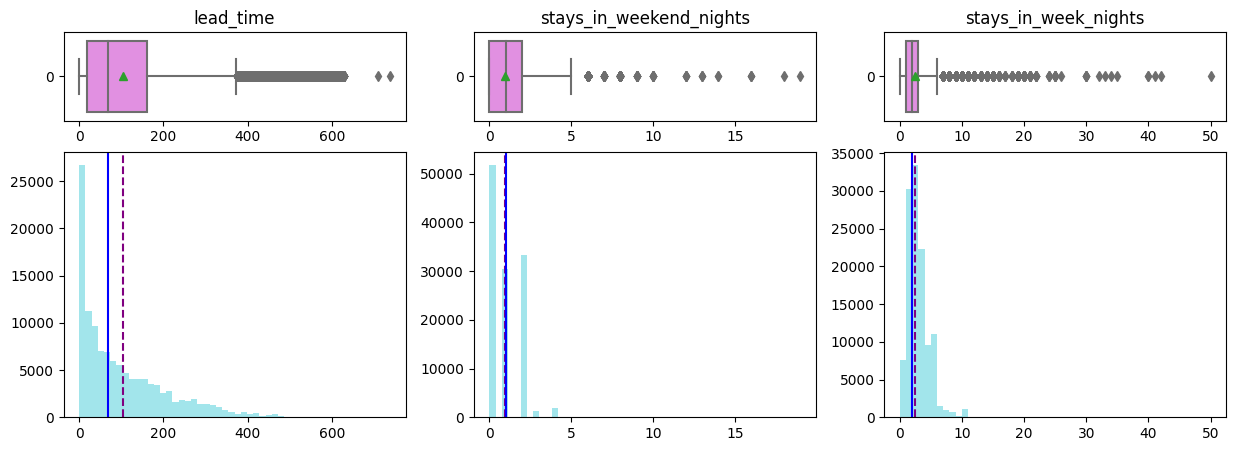

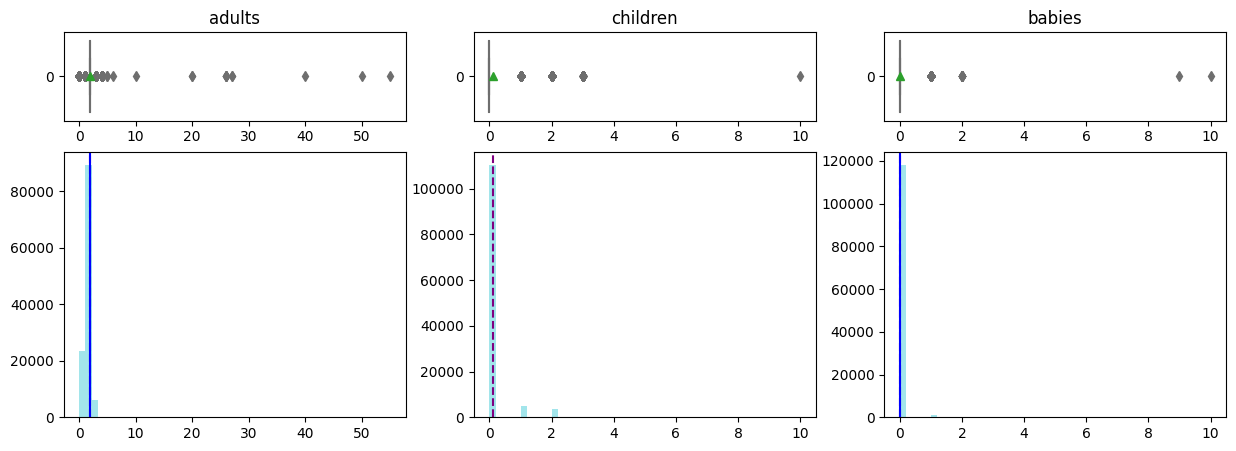

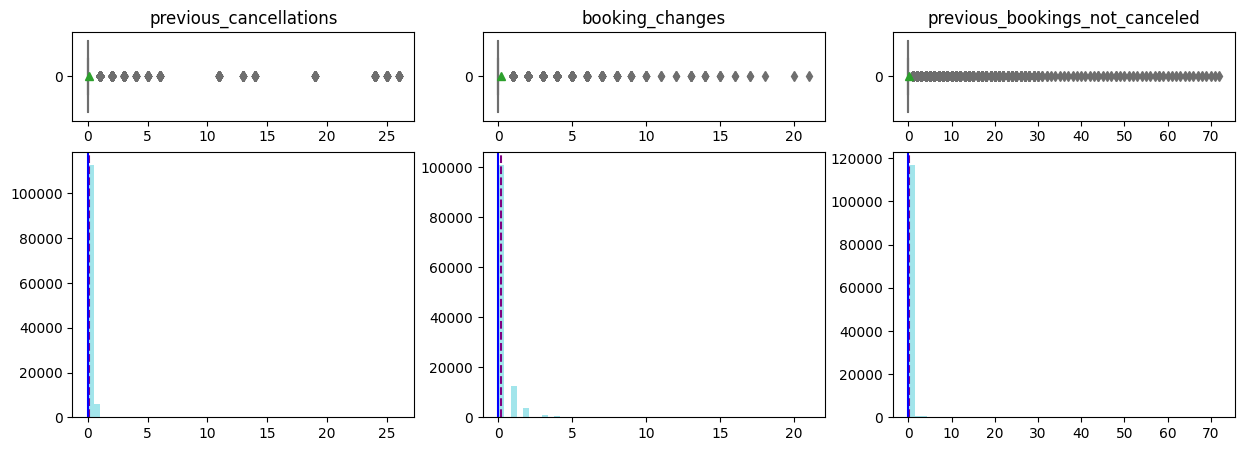

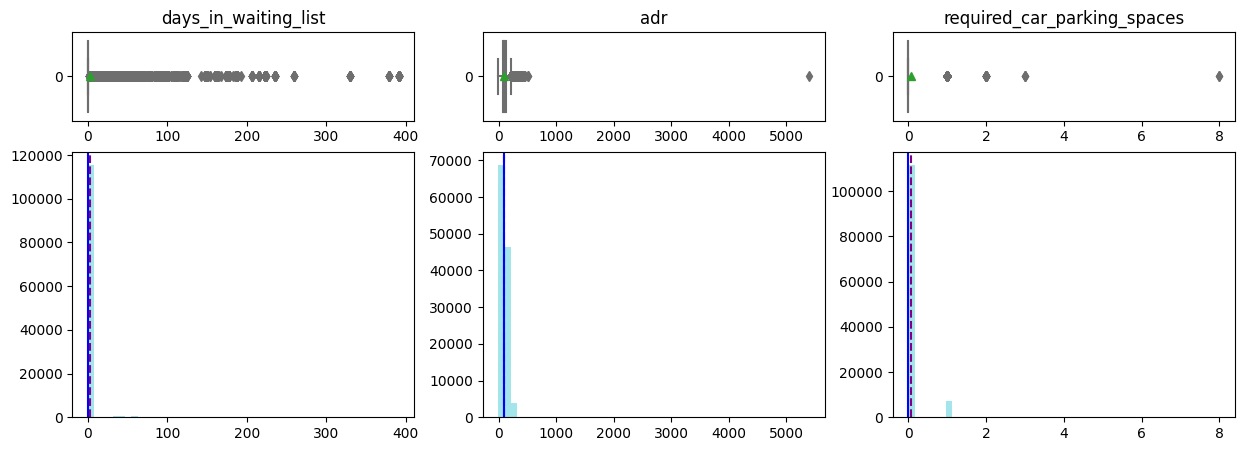

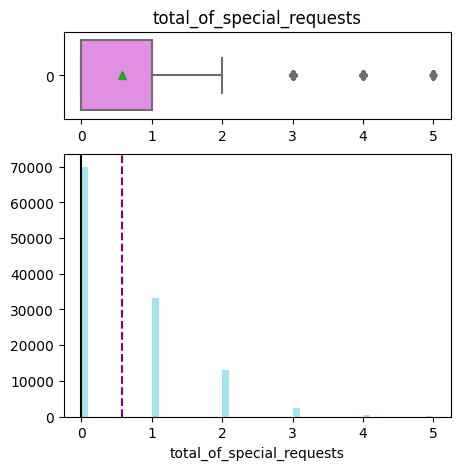

In [ ]:
create_grid_of_plots(data, Cols_Num)

### Observations
- ADR, Required Parking Spaces and Children have a big separation between the values and the outliers. Also they are few samples. We can remove the outliers
- All graphs show an important skew to the left
- Most of the reservations are done with less than a 100 days of lead time
- Most of the stays are during the weekends
- Most of the users don't have any previous cancellations, nor booking changes
- Most of the users didn't have to be in the waiting list
- Most common ADR is less than $300
- Most users dind't require parking spaces


In [ ]:
CatCols_2Rev = ["meal", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type","deposit_type","customer_type","reservation_status"]
def create_grid_of_perc_on_bar(df, columns, figsize=(30, 10)):
    num_cols = len(columns)
    num_rows = int(np.ceil(num_cols / 4))

    plt.figure(figsize=figsize)
    fig, axes = plt.subplots(nrows = num_rows, ncols=4, figsize=figsize)
    row = -1
    for i, col in enumerate(columns):
        if i%4==0:
          row+=1
        ax2 = axes[row,i%4]
        perc_on_bar(df, col, ax2)

    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()


def perc_on_bar(df,z,ax2):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(df[z]) # length of the column
    ax = sns.countplot(data= df, x = z,ax = ax2,palette='Paired')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot

        ax.annotate(percentage, (x, y), size = 10) # annotate the percantage

<Figure size 3000x1000 with 0 Axes>

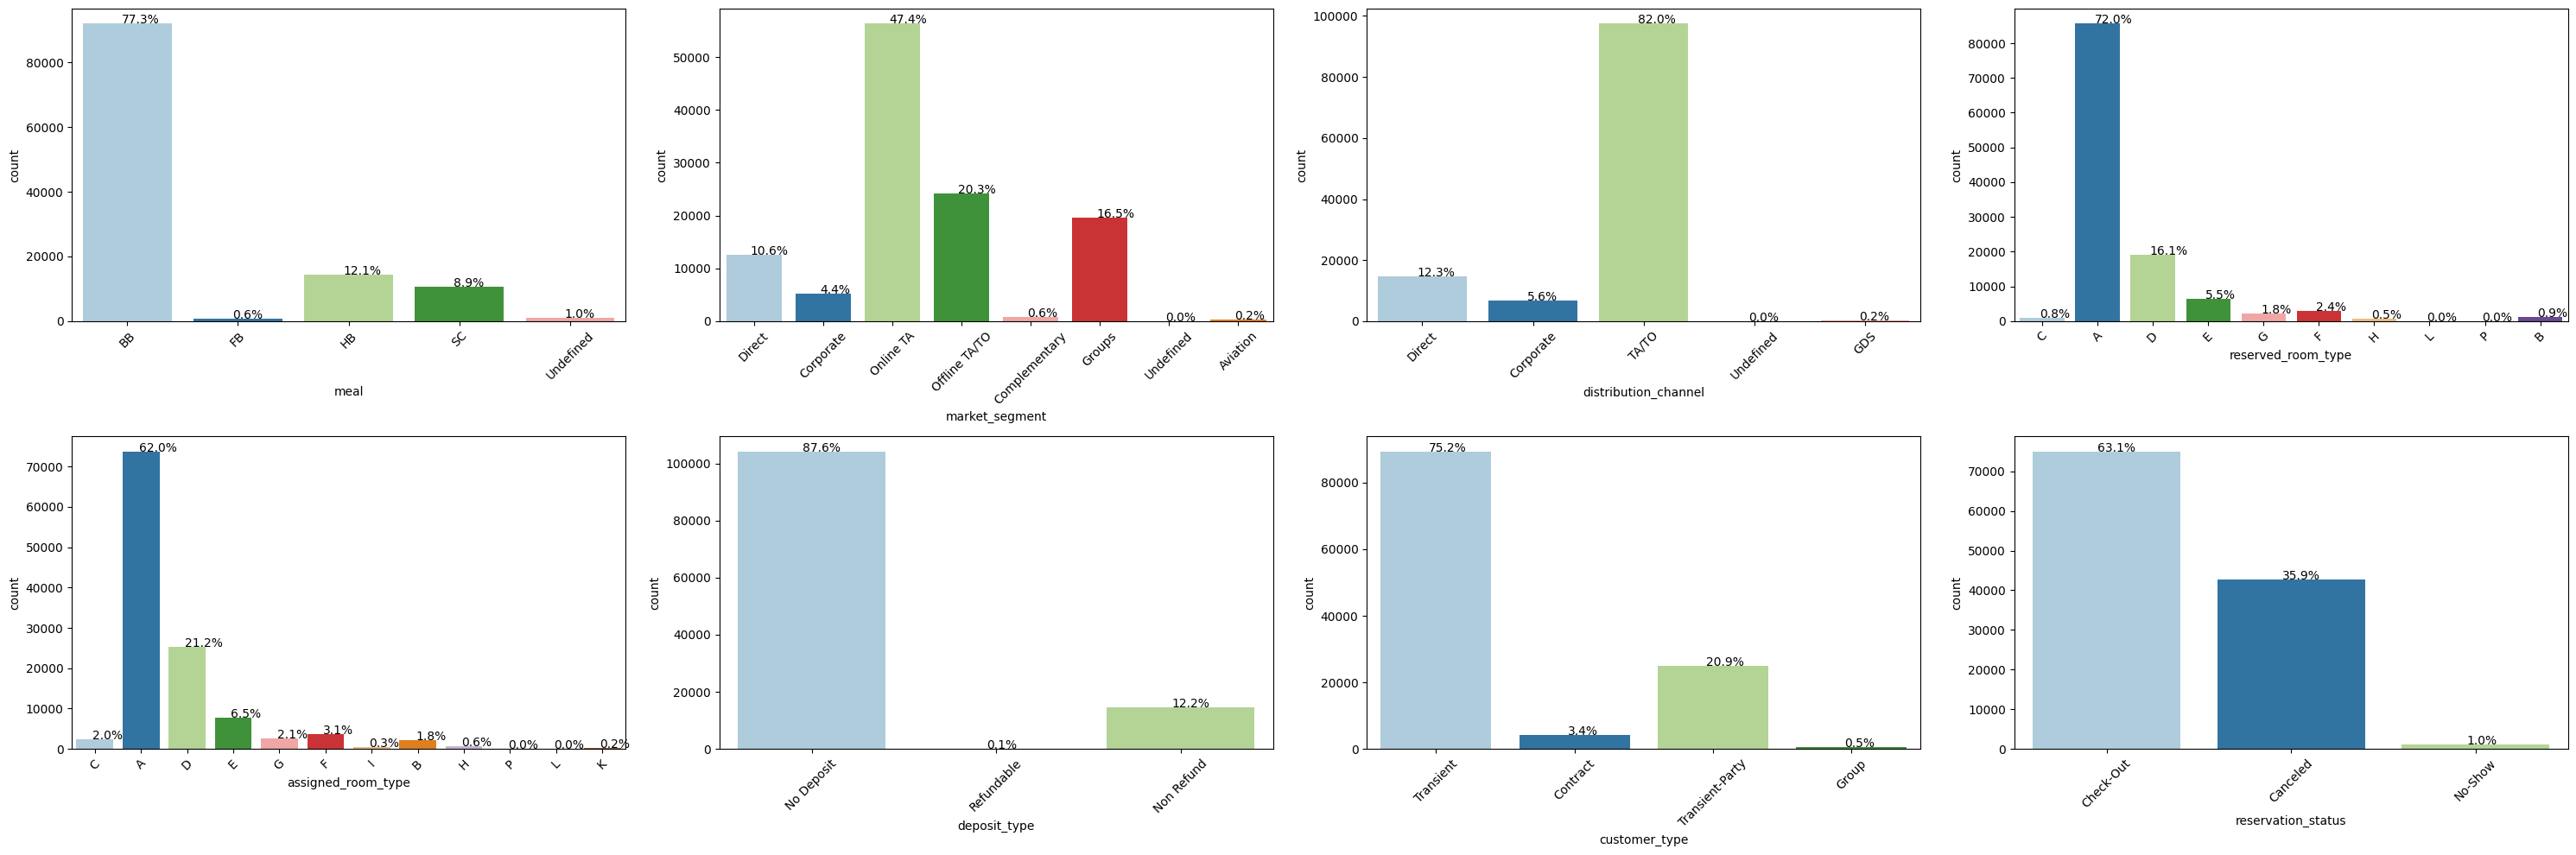

In [ ]:
create_grid_of_perc_on_bar(data,CatCols_2Rev)

### Observations:
- Most requested meal type is BB
- Biggest market segment is Online TA
- Biggest distribution channel is TA/TO
- Reserved rooms mostly match the assigned rooms
- Most of the customers do not leave a deposit
- Most customers are transient
- Most reservations are fulfilled

## Multivariate Analysis

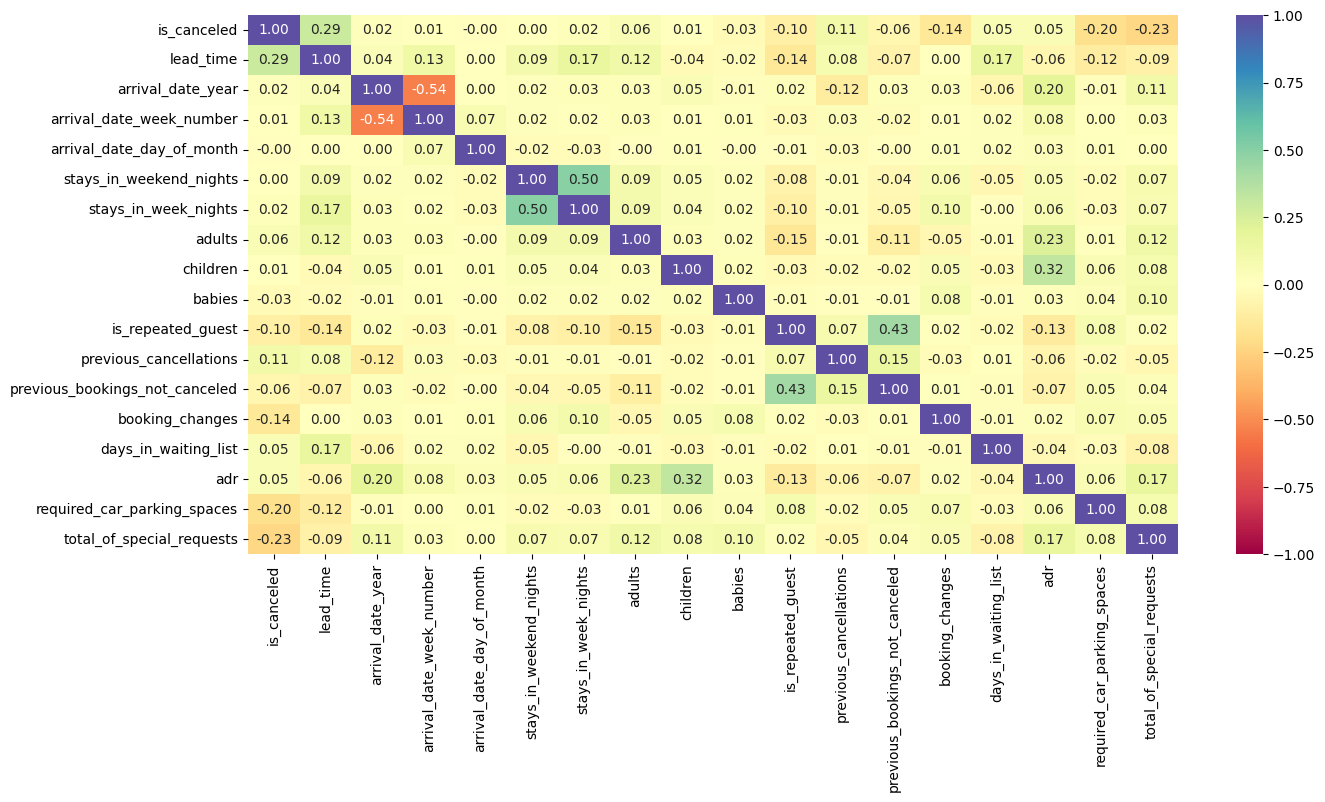

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

### Observations
- There is a positive correlation between previous booking not cancelled and if the guest is a repeated guest
- The more children, the highest the ADR
- There is a positive correlation between stays in week nights and stays in weekend nights
- The greatest the lead time, the less cancellations
- THe more special requests, the less cancellations

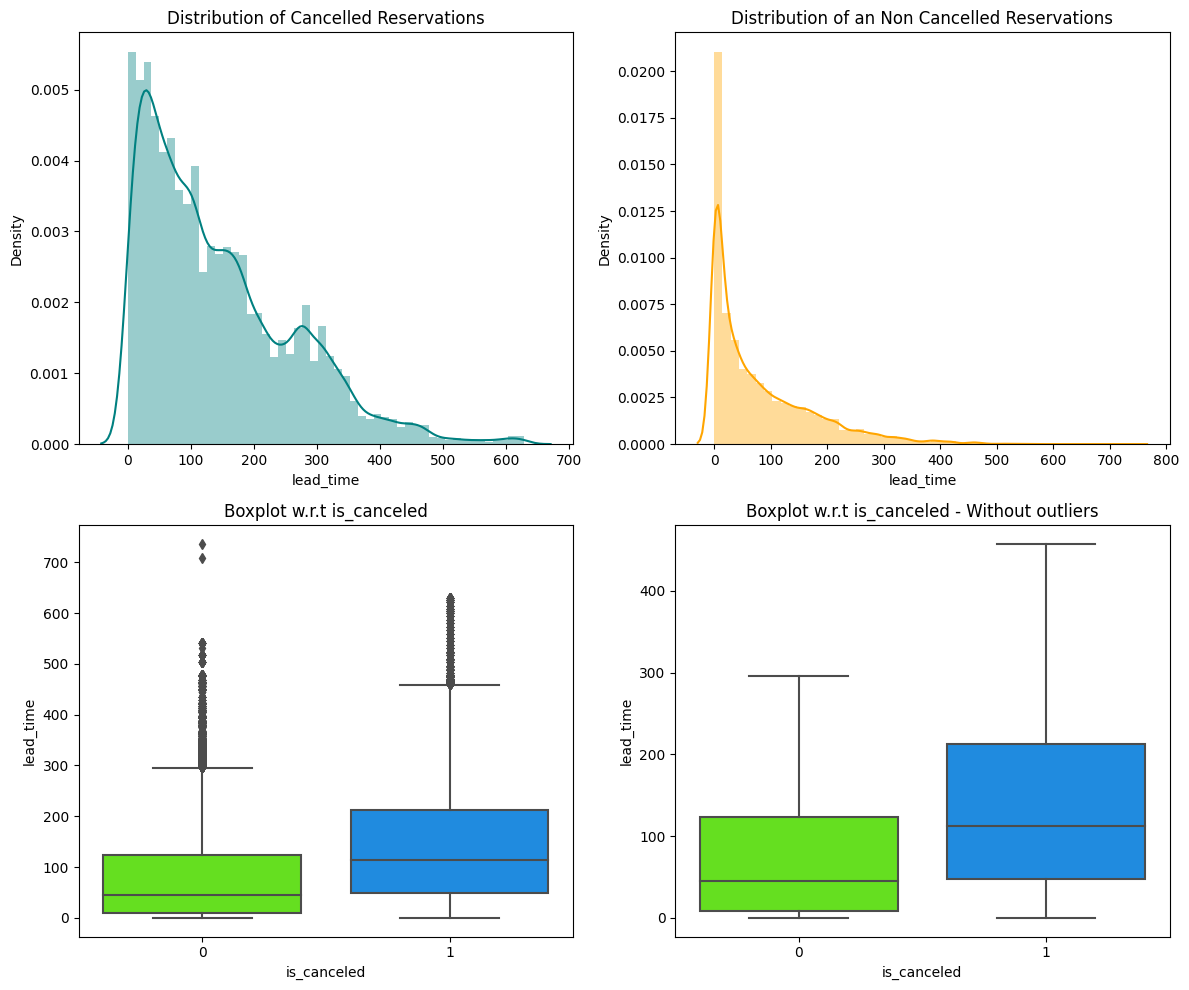

In [ ]:
def numcat_plot(x,target='is_canceled'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of Cancelled Reservations')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Distribution of an Non Cancelled Reservations')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t ' + target)
    sns.boxplot(data=data, x=target, y=x ,ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title(f'Boxplot w.r.t {target} - Without outliers')
    sns.boxplot(data=data, x=target, y=x,ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()


numcat_plot("lead_time")

The cancelled reservations had a biggest lead time

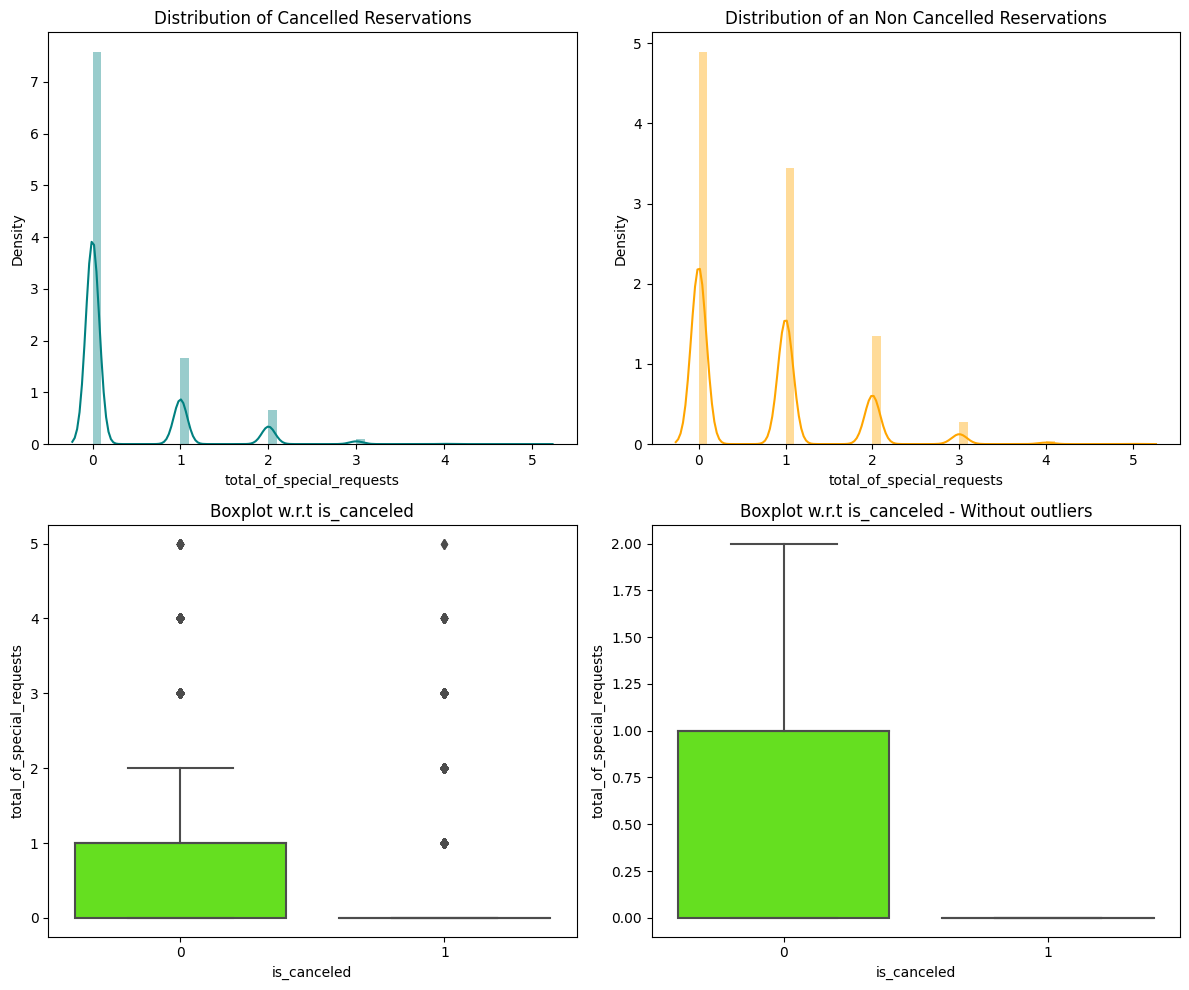

In [ ]:
numcat_plot("total_of_special_requests")

Non Cancelled Reservations had a highest number of special requests

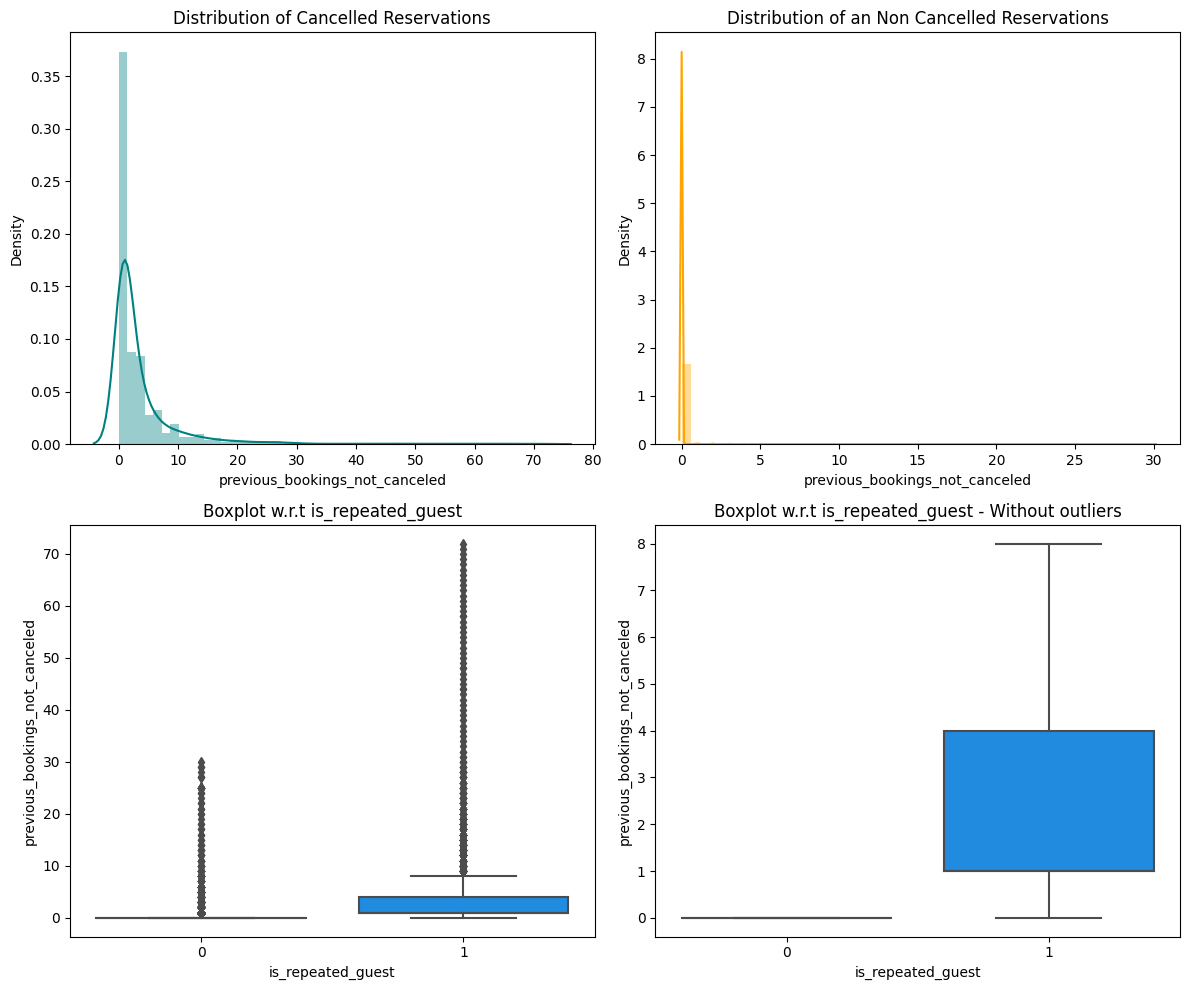

In [ ]:
numcat_plot("previous_bookings_not_canceled","is_repeated_guest")

repeated guests have a highest number of not cancelled bookings

<Axes: xlabel='children', ylabel='adr'>

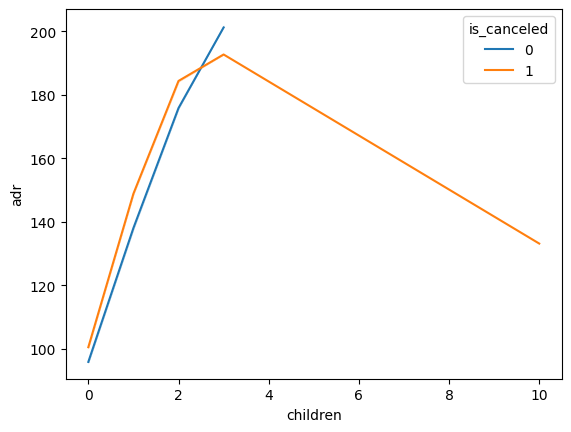

In [ ]:
sns.lineplot(data = data, x ='children', y = 'adr',hue='is_canceled',ci=0)

<Axes: xlabel='adults', ylabel='adr'>

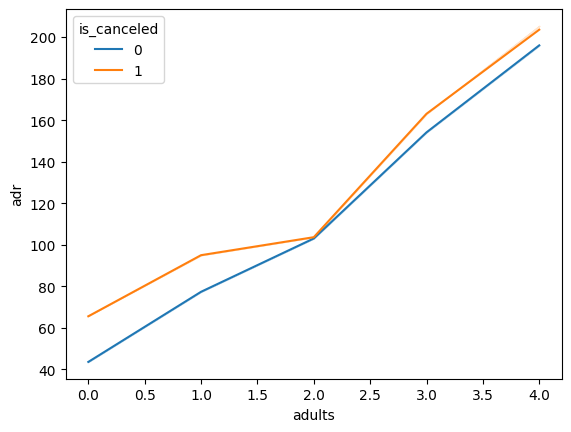

In [ ]:
sns.lineplot(data = data, x ='adults', y = 'adr',hue='is_canceled',ci=0)

In [ ]:
data = data.drop(data[data["adr"] == 0].index)

<Axes: xlabel='lead_time', ylabel='adr'>

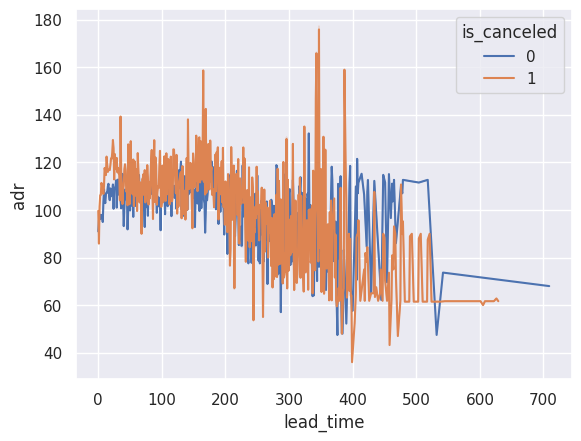

In [ ]:
sns.lineplot(data = data, x ='lead_time', y = 'adr',hue='is_canceled',ci=0)

In [ ]:
def stacked_plot(x, target = "is_canceled"):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(data[x],data[target],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(data[x],data[target],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(25,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

is_canceled               0      1     All
distribution_channel                      
All                   73280  43755  117035
TA/TO                 56744  39815   96559
Direct                11346   2452   13798
Corporate              5037   1447    6484
GDS                     152     37     189
Undefined                 1      4       5
------------------------------------------------------------------------------------------------------------------------


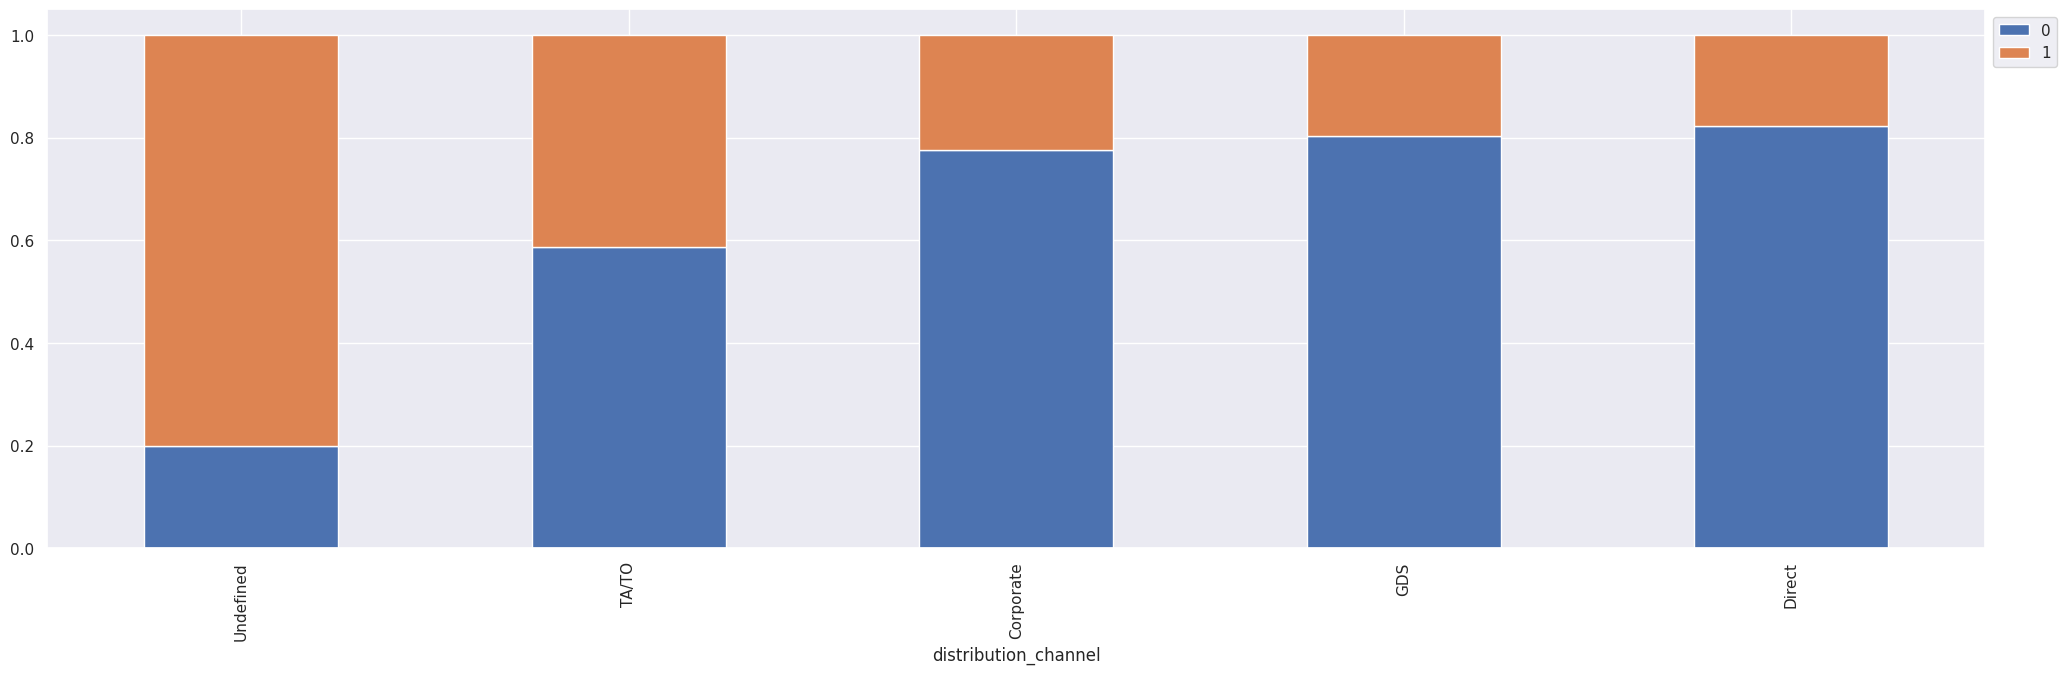

In [ ]:
stacked_plot("distribution_channel")

is_canceled          0      1     All
customer_type                        
All              73280  43755  117035
Transient        51709  36281   87990
Transient-Party  18284   6171   24455
Contract          2791   1261    4052
Group              496     42     538
------------------------------------------------------------------------------------------------------------------------


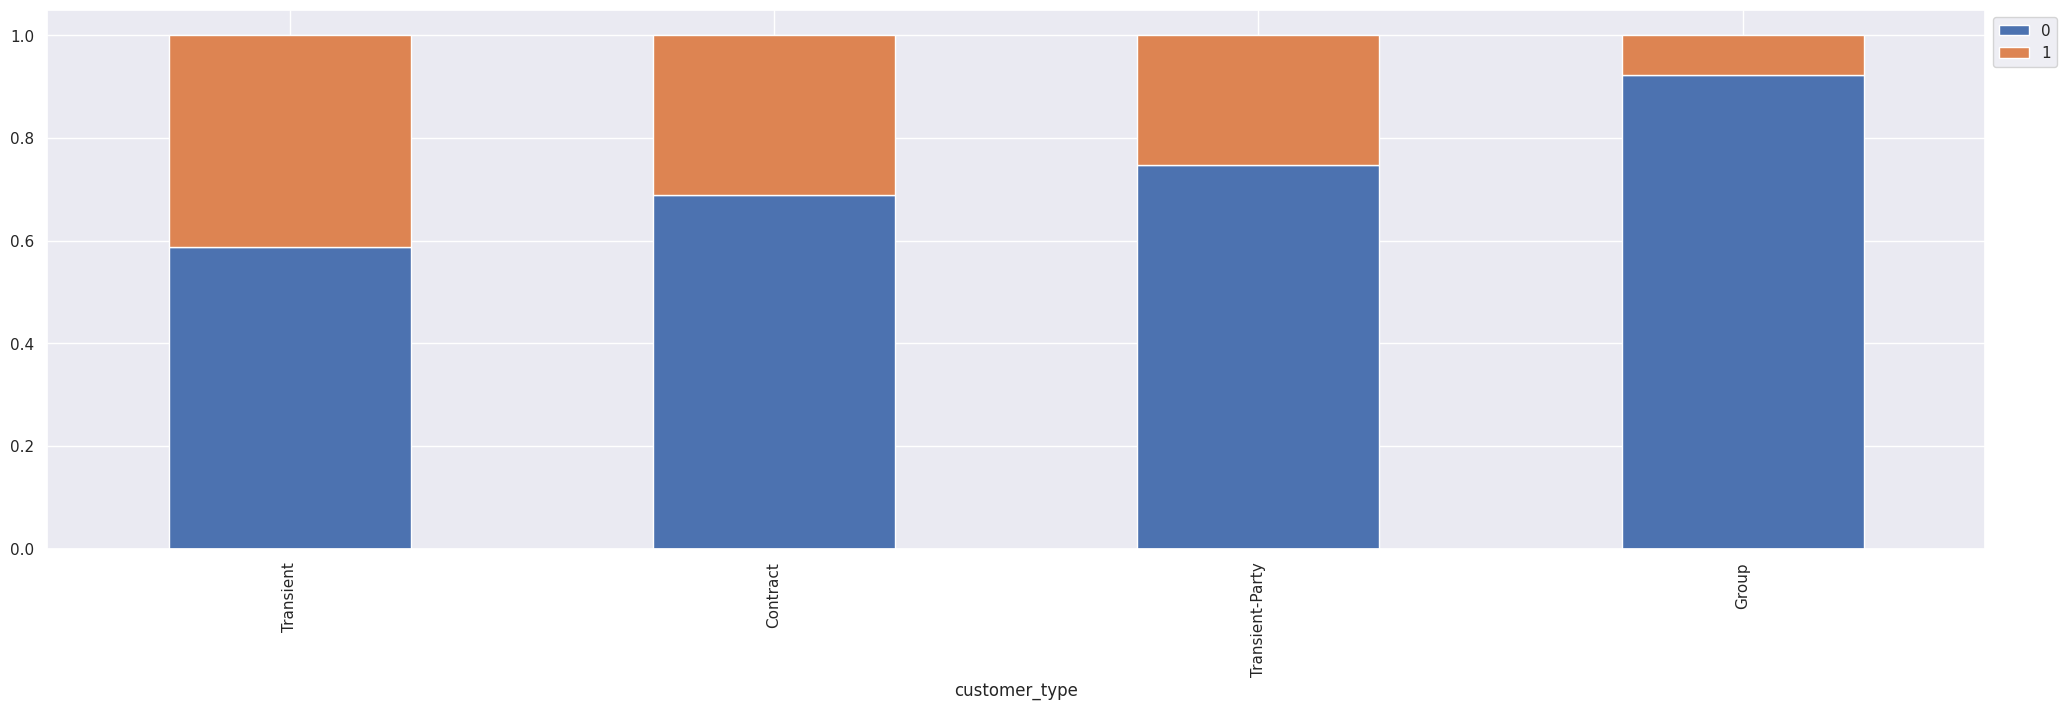

In [ ]:
stacked_plot("customer_type")

is_canceled      0      1     All
meal                             
All          73280  43755  117035
BB           56379  34107   90486
HB            9278   4960   14238
SC            6502   3927   10429
FB             275    477     752
Undefined      846    284    1130
------------------------------------------------------------------------------------------------------------------------


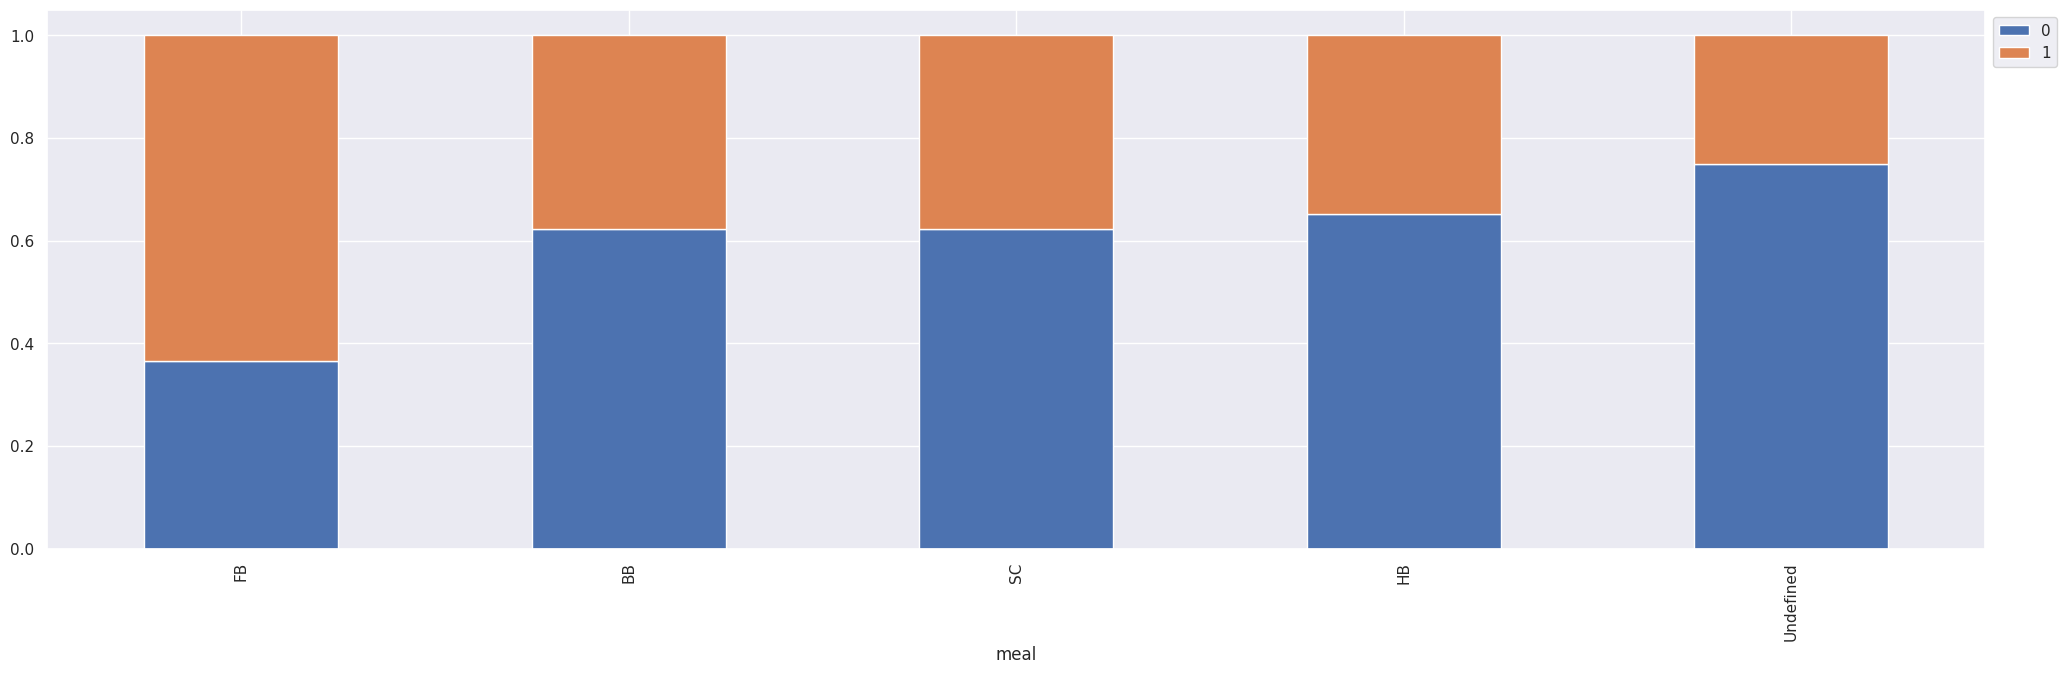

In [ ]:
stacked_plot("meal")

is_canceled      0      1     All
country                          
All          72870  43698  116568
PRT          19674  27096   46770
GBR           9594   2449   12043
ESP           6242   2176    8418
FRA           8422   1930   10352
ITA           2416   1329    3745
DEU           6022   1216    7238
IRL           2534    832    3366
BRA           1381    826    2207
USA           1586    499    2085
BEL           1861    471    2332
CHN            535    462     997
CHE           1295    426    1721
NLD           1710    386    2096
CN            1021    254    1275
RUS            386    238     624
AUT           1026    229    1255
SWE            791    227    1018
POL            696    213     909
AGO            150    205     355
NOR            425    181     606
ISR            497    169     666
ROU            366    134     500
LUX            177    109     286
DNK            325    109     434
MAR            147    107     254
AUS            319    107     426
TUR           

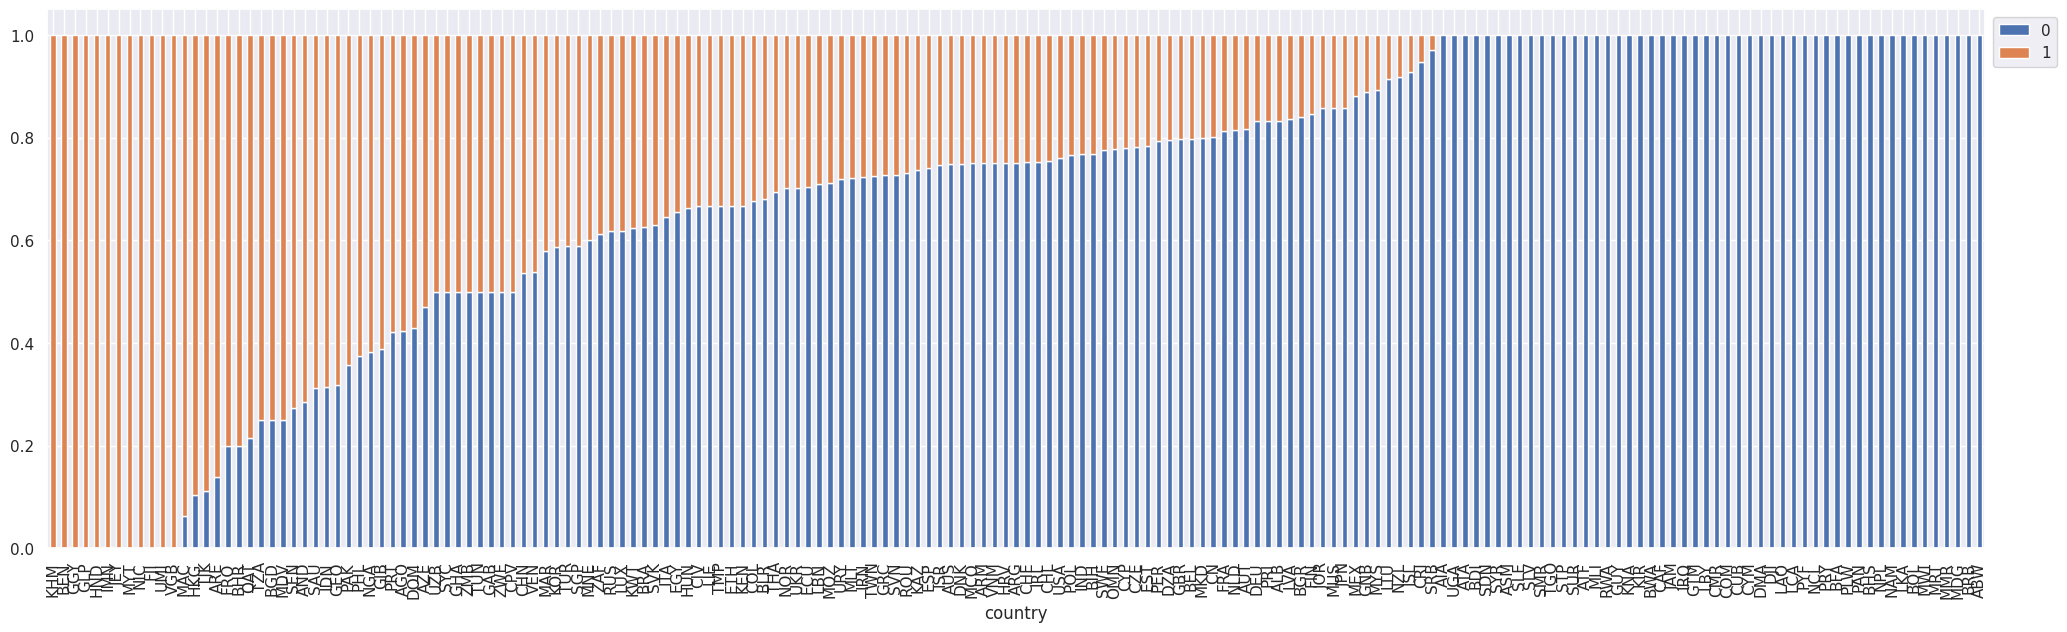

In [ ]:
stacked_plot("country")

[Text(0, 0, 'July'),
 Text(1, 0, 'August'),
 Text(2, 0, 'September'),
 Text(3, 0, 'October'),
 Text(4, 0, 'November'),
 Text(5, 0, 'December'),
 Text(6, 0, 'January'),
 Text(7, 0, 'February'),
 Text(8, 0, 'March'),
 Text(9, 0, 'April'),
 Text(10, 0, 'May'),
 Text(11, 0, 'June')]

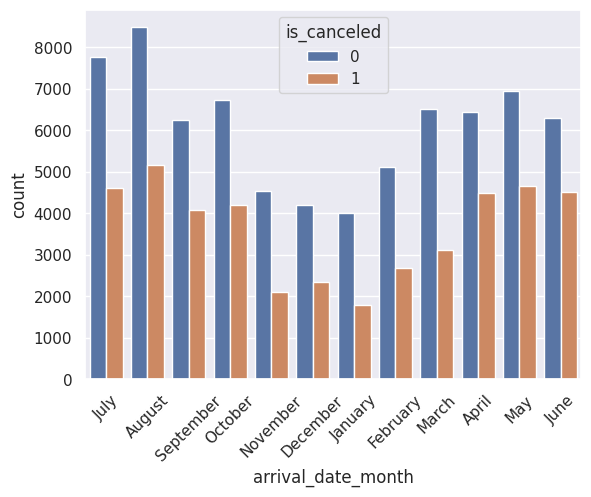

In [ ]:
ax =sns.countplot(data=data, x='arrival_date_month', hue='is_canceled')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, '2017'), Text(1, 0, '2018'), Text(2, 0, '2019')]

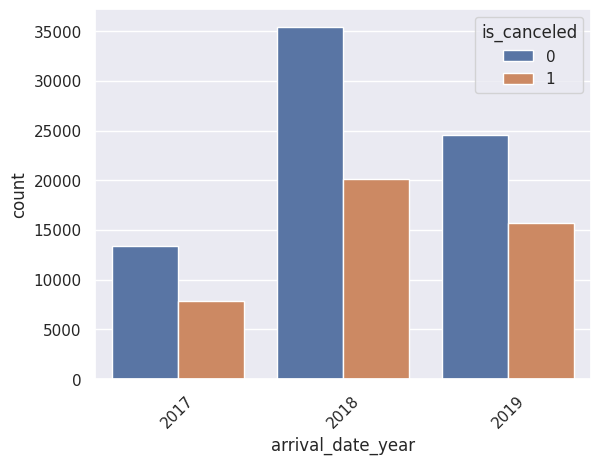

In [ ]:
ax = sns.countplot(data=data, x='arrival_date_year', hue='is_canceled')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)